In [1]:
#https://www.martinos.org/mne/stable/auto_tutorials/plot_ecog.html

# Authors: Eric Larson <larson.eric.d@gmail.com>
#          Chris Holdgraf <choldgraf@gmail.com>
#
# License: BSD (3-clause)

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mayavi import mlab

import mne
from mne.viz import plot_alignment, snapshot_brain_montage

print (__doc__)

C:\Users\Mutoh Kohki\Anaconda3\envs\py27\lib\site-packages\dateutil\parser\_parser.py:1175: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif res.tzname and res.tzname in time.tzname:


In [3]:
mat = loadmat(mne.datasets.misc.data_path() + '/ecog/sample_ecog.mat')
ch_names = mat['ch_names'].tolist()
elec = mat['elec'] # electrode positions given in meters
dig_ch_pos = dict(zip(ch_names, elec))
mon = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)
print ('Created %s channel position' % len(ch_names))

In [4]:
info = mne.create_info(ch_names, 1000., 'ecog', montage=mon)

In [6]:
subjects_dir = mne.datasets.sample.data_path() + '/subjects'
fig = plot_alignment(info, subject='sample', subjects_dir=subjects_dir,
                    surfaces=['pial'])
mlab.view(200, 70)

(200.0, 70.0, 0.33399867248535153, array([0., 0., 0.]))

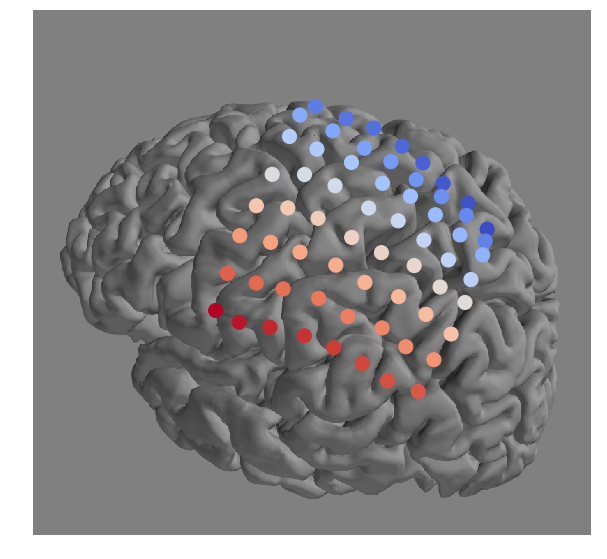

In [5]:
# We'll once again plot the surface, then take a snapshot.
fig = plot_alignment(info, subject='sample', subjects_dir=subjects_dir,
                    surfaces='pial')
mlab.view(200, 70)
xy, im = snapshot_brain_montage(fig, mon)

# Convert from a dictionary to array to plot
xy_pts = np.vstack(xy[ch] for ch in info['ch_names'])

# Define an arbitrary "activity" pattern for viz
activity = np.linspace(100, 200, xy_pts.shape[0])

# This allows us to use matplotlib to create arbitrary 2d scatterplots
_, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im)
ax.scatter(*xy_pts.T, c=activity, s=200, cmap='coolwarm')
ax.set_axis_off()
plt.show()